# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

Using TensorFlow backend.


# Data Preprocessing

In [2]:
data=pd.read_csv("Iris.csv")
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [3]:
e=LabelEncoder()
y[:]=e.fit_transform(y[:])
y=y.reshape(-1,1)
ohe=OneHotEncoder()
y=ohe.fit_transform(y[:]).toarray()

In [4]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Neural Network

In [5]:
def deepl():
    model=Sequential()
    s=x.shape[1]
    s1=y.shape[1]
    model.add(Dense(s,input_dim=s,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(s1,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [6]:
model=deepl()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [7]:
pm=model.fit(x,y,batch_size=1,epochs=2,verbose=1,validation_split=0.1)


Train on 135 samples, validate on 15 samples
Epoch 1/2
135/135 [==============================] - 0s 2ms/step - loss: 1.1133 - accuracy: 0.2889 - val_loss: 0.6681 - val_accuracy: 1.0000
Epoch 2/2
135/135 [==============================] - 0s 736us/step - loss: 0.9319 - accuracy: 0.6370 - val_loss: 0.4746 - val_accuracy: 1.0000


# Model Performance

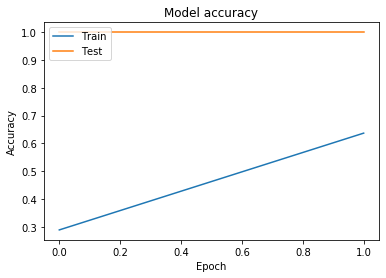

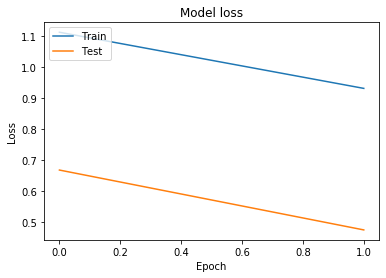

<Figure size 432x288 with 0 Axes>

In [8]:
plt.plot(pm.history['accuracy'])
plt.plot(pm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('resources/accuracy.jpg')

plt.plot(pm.history['loss'])
plt.plot(pm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('resources/loss.jpg')